In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

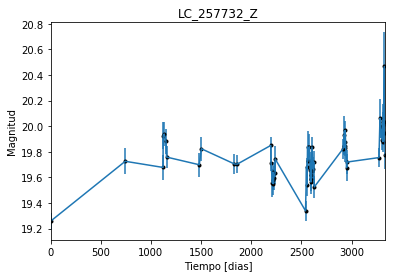

In [2]:
data = np.genfromtxt('LC_257732_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_257732_Z')
plt.savefig("LC_257732_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

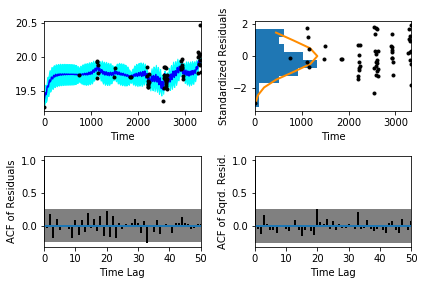

In [5]:
sample.assess_fit()

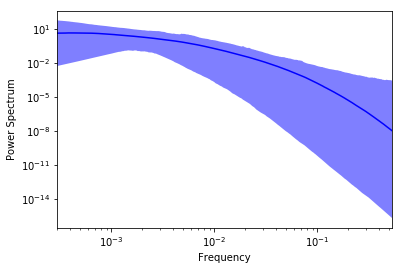

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

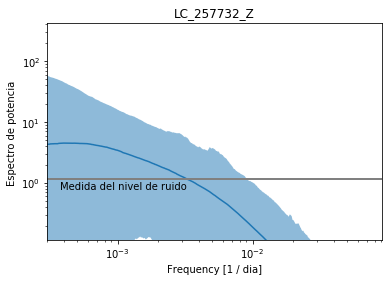

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_257732_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_257732_Z')

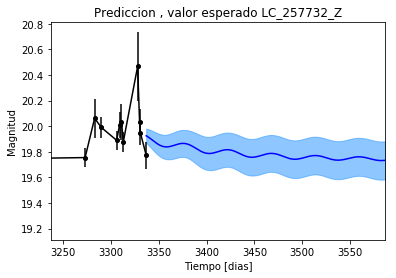

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_257732_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_257732_Z')

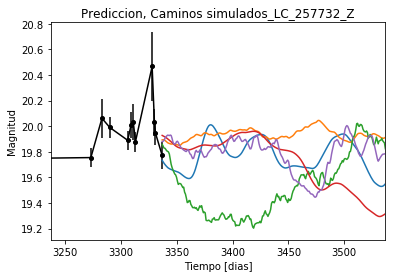

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_257732_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


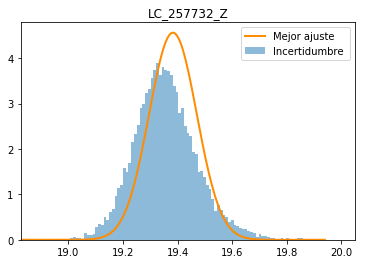

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_257732_Z')
plt.savefig("Mejor_ajuste_LC_257732_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_257732_Z')

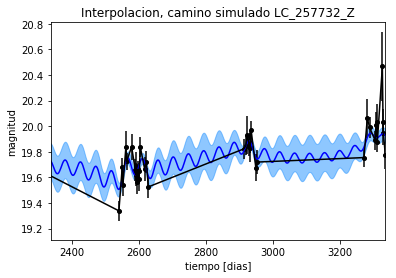

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_257732_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_257732_Z')

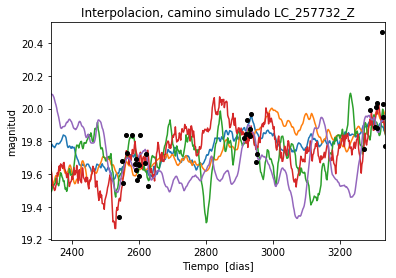

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_257732_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 608.419394387
Median: 0.0261951181398
Standard deviation: 0.22703882743
68% credibility interval: [ 0.00233776  0.28644479]
95% credibility interval: [  5.18874623e-04   8.51044276e-01]
99% credibility interval: [  3.38598712e-04   1.03323712e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 679.546298543
Median: 0.00704605481733
Standard deviation: 0.110118619585
68% credibility interval: [ 0.00104354  0.06955071]
95% credibility interval: [  3.67393134e-04   3.80616167e-01]
99% credibility interval: [  3.17449511e-04   7.55234901e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1411.07556082
Median: 0.06613700644
Sta

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 883.66061278
Median: 58.8887055843
Standard deviation: 1.71336741702
68% credibility interval: [ 56.93804768  60.22609698]
95% credibility interval: [ 54.49760754  60.9890142 ]
99% credibility interval: [ 52.63287754  61.26703447]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 369.085000514
Median: 1.32905305501
Standard deviation: 2.61451570389
68% credibility interval: [ 0.19024139  5.21555191]
95% credibility interval: [ 0.03326426  9.20048768]
99% credibility interval: [  0.01618841  11.92817304]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 884.835569206
Median: 1.41722167734
Standard deviation: 11.567555976
68% credibility interval: [  0.06968565  14.12620955]
95% credibility interval: [  7.15659209e-

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1065.70254848
Median: 5.21866174954e-17
Standard deviation: 3.09787618632e+108
68% credibility interval: [  4.18388927e-64   5.64121657e+24]
95% credibility interval: [  7.70590870e-106   2.81771642e+090]
99% credibility interval: [  3.19953367e-168   6.27031828e+102]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2455.9170423
Median: 19.6996684044
Standard deviation: 0.0774837800395
68% credibility interval: [ 19.63012426  19.76010539]
95% credibility interval: [ 19.5223102   19.83525042]
99% credibility interval: [ 19.41949146  19.9303202 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 692.159743652
Median: 0.0304627215444
Standard deviation: 0.270447248795
68% credibility interval: [ 0.         0.4576904]
95% credibility interval: [ 0.         0.9427426]
99% credibility interval: [ 0.          1.04097919]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 692.159743652
Median: 0.0304627215444
Standard deviation: 0.270447248795
68% credibility interval: [ 0.         0.4576904]
95% credibility interval: [ 0.         0.9427426]
99% credibility interval: [ 0.          1.04097919]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1282.30387877
Median: 0.0
Standard deviation: 0.00221482853148
68% credibility

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 883.66061278
Median: 58.8887055843
Standard deviation: 1.71336741702
68% credibility interval: [ 56.93804768  60.22609698]
95% credibility interval: [ 54.49760754  60.9890142 ]
99% credibility interval: [ 52.63287754  61.26703447]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1477.1506522
Median: 0.0357504397459
Standard deviation: 0.0296347456097
68% credibility interval: [ 0.02200611  0.06333259]
95% credibility interval: [ 0.01469095  0.11913311]
99% credibility interval: [ 0.01106635  0.19052323]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1277.76388497
Median: 1.03341029903
Standard deviation: 0.20310162262
68% credibility interval: [ 0.86325012  1.2529782 ]
95% credibility interval: [ 0.73050471  1.53027635]
99% credibility interval: [ 0.66401418  1.70395202]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 817.117436011
Median: 0.00170801595625
Standard deviation: 0.667608359803
68% credibility interval: [  9.13609487e-27   1.16497247e-01]
95% credibility interval: [  7.47351542e-93   1.25553402e+00]
99% credibility interval: [  4.30347453e-106   4.08726436e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 608.419394387
Median: (-0.164588781416-2.64546387905j)
Standard deviation: 2.21867043446
68% credibility interval: [-1.7997857-2.10018487j -0.0146886-1.21450016j]
95% credibility interval: [ -5.34726889e+00+0.j          -3.26018541e-03-0.08703129j]
99% credibility interval: [ -6.49202032e+00+0.j          -2.12747845e-03-0.00045621j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 679.546298543
Median: (-0.0442716681018+0.882460091164j)
Standard deviation: 1.83473125936
68% credibility interval: [-0.43699998+3.27294474j -0.00655674+0.j        ]
95% credibility interval: [ -2.39148191e+00+5.81418819j  -2.30839914e-03+0.j        ]
99% credibility interval: [ -4.74528083e+00+2.38799519j  -1.99459410e-03+0.j        ]
Poster